In [1]:
import time
start_time=time.time()
from pathlib import Path
import sys
import json
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Add path to py_modules 
sys.path.append(str(Path().resolve().parents[1] / 'py_modules')) # 1 level up = project root

# Add path to pipeline_config.py
sys.path.append(str(Path().resolve().parents[0]))  # 1 level up = project root

# Import from pipeline_config and py_modules
from pipeline_config import OBSERVATIONS_DIR, MAPS_DIR

#from io_utils import load_fits
#import strucfunc
#from strucfunc import sosflog
#import bfuncx

In [3]:
# List of line names and keys for output
lines = [
    ("H_I-6563", "H"),
    ("O_III-5007", "O1"),
    ("O_III-4959", "O2"),
]

# Dictionaries to store results
sb_ = {}
vv_ = {}

for name, key in lines:
    flux_path   = OBSERVATIONS_DIR / f'linesum-{name}.fits'
    radvel_path = OBSERVATIONS_DIR / f'mean-{name}-patfixx.fits'

    # Load data
    flux = fits.open(flux_path)
    rad_vel = fits.open(radvel_path)

    sb = flux[0].data.astype(float)
    vv = rad_vel[0].data.astype(float)

    # Clean data
    m = ~np.isfinite(sb * vv) | (sb < 0.0)
    sb[m] = 0.0
    vv[m] = np.nanmean(vv)
    sb /= sb.max()

    # Optional: threshold mask
    good = (~m) & (sb > 0.001)

    # Store results
    sb_[key] = sb
    vv_[key] = vv


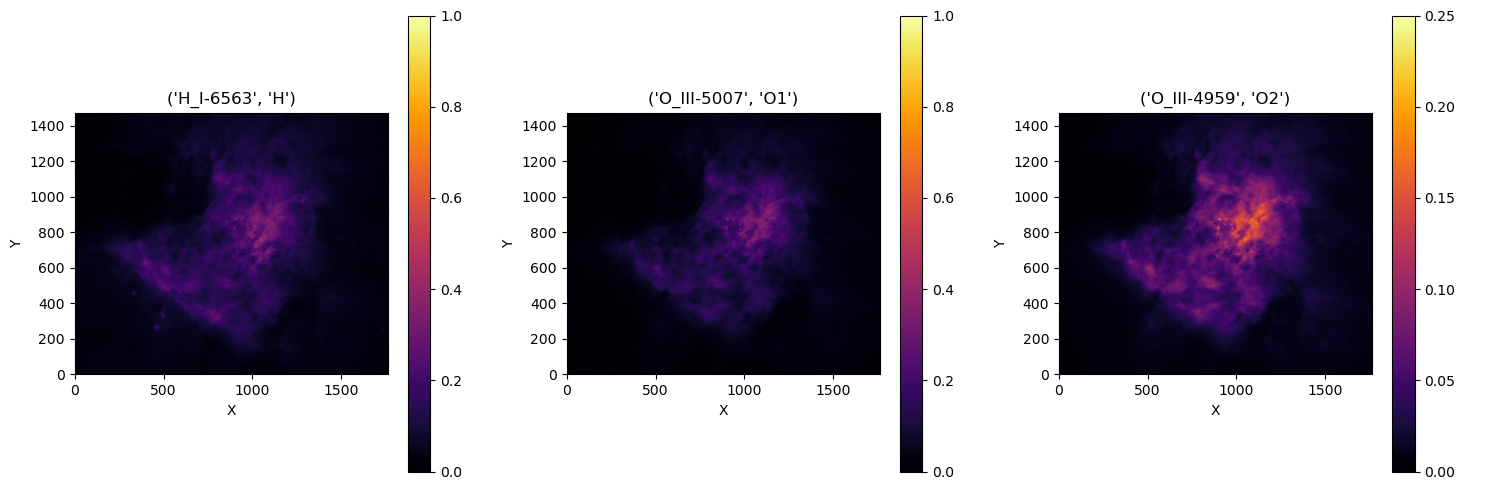

In [4]:
sbs = [sb_['H'], sb_['O1'], sb_['O2']]
clims_sb = [(0,1), (0,1), (0,.25)]

# Create 2x3 subplot grid
#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Flatten axes for easier iteration
axes = axes.flatten()

for i in range(3):
    im = axes[i].imshow(sbs[i], cmap='inferno')
    im.set_clim(clims_sb[i])  # Set individual color limits

    # Add colorbar to each subplot
    cbar = plt.colorbar(im, ax=axes[i])
    cbar.set_label(' ', rotation=270, labelpad=15)

    axes[i].set_title(lines[i])
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

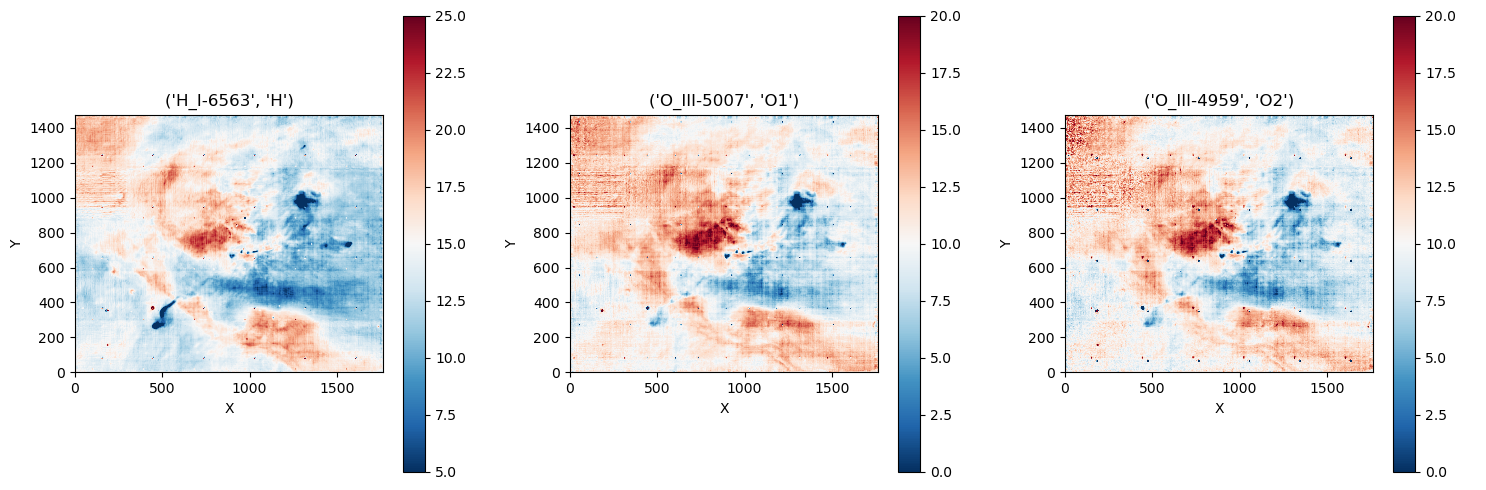

In [6]:
vvs = [vv_['H'], vv_['O1'], vv_['O2']]
clims_vv = [(5,25), (0,20), (0,20)]

# Create 2x3 subplot grid
#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Flatten axes for easier iteration
axes = axes.flatten()

for i in range(3):
    im = axes[i].imshow(vvs[i],  cmap='RdBu_r')
    im.set_clim(clims_vv[i])  # Set individual color limits

    # Add colorbar to each subplot
    cbar = plt.colorbar(im, ax=axes[i])
    cbar.set_label(' ', rotation=270, labelpad=15)

    axes[i].set_title(lines[i])
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

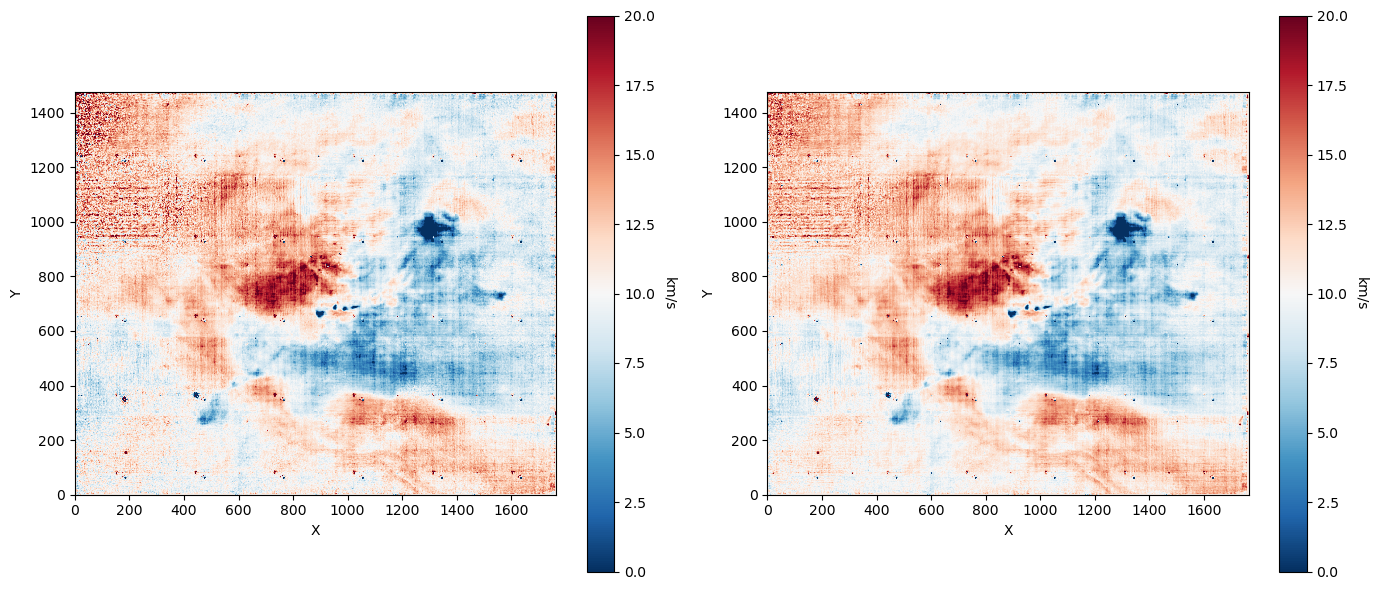

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1 ---
im1 = axes[0].imshow( vv_['O2'], cmap='RdBu_r')
im1.set_clim(0, 20)
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('km/s', rotation=270, labelpad=15)

axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].invert_yaxis()

# --- Plot 2 ---
im2 = axes[1].imshow((vv_['O1'] + vv_['O2']) / 2, cmap='RdBu_r')  # Replace with your second array
im2.set_clim(0, 20)
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label('km/s', rotation=270, labelpad=15)

axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()